## 数据集归一化与反归一化

In [4]:
import numpy as np

In [2]:
a = np.array([[4, 40, 32], [20, 3, 7], [30, 25, 9]])

In [3]:
def Zero_To_One(data):
    min = np.min(data, axis=0)
    max = np.max(data, axis=0)    
    return (data-min) / (max - min), min, max 

b, m, n = Zero_To_One(a)
print(b)
print(m)

[[0.         1.         1.        ]
 [0.61538462 0.         0.        ]
 [1.         0.59459459 0.08      ]]
[4 3 7]


In [4]:
# 反归一化
def back_To_origin(data, min, max):
    return data*(max-min) + min

c = back_To_origin(b, m, n)
print(c)

[[ 4. 40. 32.]
 [20.  3.  7.]
 [30. 25.  9.]]


In [22]:
import torch
from torch.utils.data import DataLoader

data = torch.Tensor(b).to(torch.float64)
dataload = DataLoader(data, batch_size=1)

In [23]:
item = []
for x in dataload:
    item.append(back_To_origin(x,m,n).squeeze().numpy())
    print(item)
nn = np.stack(item)

[array([ 4., 40., 32.])]
[array([ 4., 40., 32.]), array([20.0000006,  3.       ,  7.       ])]
[array([ 4., 40., 32.]), array([20.0000006,  3.       ,  7.       ]), array([30.        , 25.00000012,  8.99999996])]


In [24]:
print(nn)

[[ 4.         40.         32.        ]
 [20.0000006   3.          7.        ]
 [30.         25.00000012  8.99999996]]


## Matplotlib

In [1]:
import matplotlib.pyplot as plt

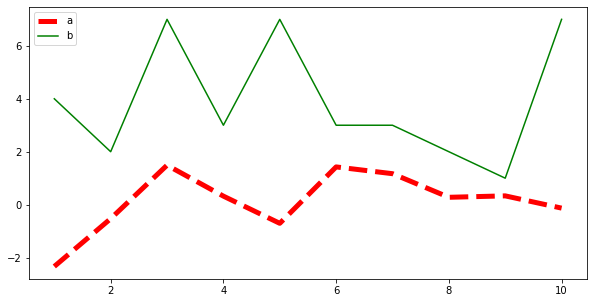

In [31]:
# 基础用法


plt.figure(figsize=(10,5))    # 打开一张画布窗口，还可以指定size
y = np.random.randn(10)
z = np.random.randint(1, 10, 10)
x = np.linspace(1, 10, 10)
plt.plot(x,y, c='r', label='a', linewidth = 5, linestyle = '--')   # 同一张figure上绘制两条曲线，可以指定线宽等属性
plt.plot(x,z, c='g', label='b')   # 只有给曲线指定label了才能显示legend内容（图例标注）,也可以在legend属性下的labels指定
plt.legend()    # ‘loc’里面什么都不写的话系统自动判断应该把图注放在哪里
plt.show()

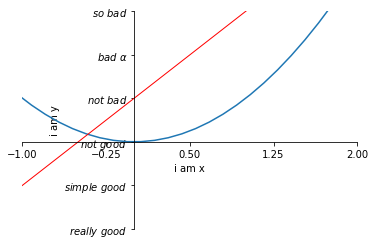

In [44]:
# 坐标轴
x= np.linspace(-3, 3, 50)
y1 = 2*x+1
y2=x**2
plt.figure()
plt.plot(x, y2)
plt.plot(x, y1, color= 'red', linewidth=1.0, linestyle='-')
plt.xlim((-1, 2))   # 定义坐标轴取值范围
plt.ylim((-2, 3))
plt.xticks(np.linspace(-1, 2, 5))   # 改变坐标轴取值间隔，即最小单位
plt.yticks([-2, -1, 0, 1, 2, 3],    # 还可以把坐标轴上的数字替换成自定义文本
        [r'$really\ good$', r'$simple\ good$', r'$not\ good$', r'$not\ bad$', r'$bad\ \alpha$', r'$so\ bad$'])
plt.xlabel('i am x')
plt.ylabel('i am y')

# gca函数表示get current axis，一张图实际上是有4个轴，上下左右
ax = plt.gca()
# 下面我们可以改变任意坐标轴
ax.spines["right"].set_color('none')
ax.spines["top"].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines["bottom"].set_position(( 'data', 0)) # outward, axes
ax.spines["left"].set_position(( 'data', 0))   # 移动坐标轴原点

plt.show()

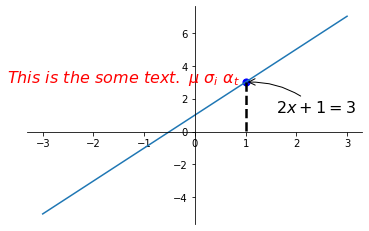

In [72]:

x = np.linspace(-3, 3, 50)
y = 2*x + 1
plt.plot(x, y)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines["top"].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position("bottom")
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position("left")
ax.spines['left'].set_position(('data', 0))

x0=1
y0= 2*x0+ 1
plt.scatter(x0, y0, s=50, color='b')
plt.plot([x0, x0], [y0, 0], 'k--', lw=2.5)

# method 1   加图像说明注释
#####################
plt.annotate(r'$2x+1=%s$' % y0, xy=(x0, y0), xycoords= 'data', xytext=(+30, -30), textcoords= 'offset points',
fontsize= 16, arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=.2'))
# method 2
###################   单纯加文本注释
plt.text(-3.7, 3, r'$This\ is\ the\ some\ text.\ \mu\ \sigma_i\ \alpha_t$', fontdict={'size': 16, 'color': 'r'})


plt.show()

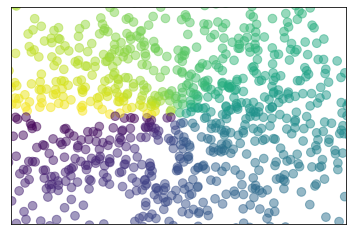

In [74]:
## 散点图
n= 1024 
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X) # for color value
plt.scatter(X, Y, s=75, c=T, alpha=0.5)   # alpha设置透明度
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.xticks(())
plt.yticks(())
plt.show()


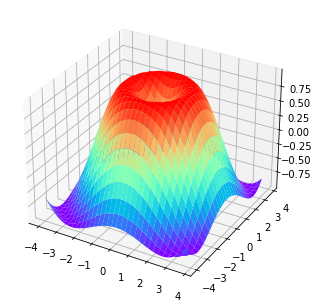

In [76]:
## 3D绘图
from operator import rshift
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
#X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R= np.sqrt(X** 2+ Y**2) 
# height value
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))   # 画出立体图像
plt.show()
